<a href="https://colab.research.google.com/github/dquerales/jupyter-automation-github-actions/blob/main/notebooks/pycaret_regression_time_series.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to PyCaret - An open source low-code ML library

## Load libraries

In [1]:
!pip install pycaret

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 481.8/481.8 kB 6.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 105.8/105.8 kB 5.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.4/46.4 kB 2.5 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 9.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 150.0/150.0 kB 14.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.2/81.2 kB 8.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.0/44.0 kB 3.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.9/16.9 MB 51.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 212.5/212.5 kB 16.6 MB/s eta 0:00:00


In [9]:
from pycaret.regression import *
import pandas as pd
import numpy as np

## Load data

In [182]:
df = pd.read_csv('https://api.blockchain.info/charts/market-price?format=csv', header=None, names=['date', 'price'])

In [183]:
df.head()

,date,price
0,2022-05-07 00:00:00,36013.03
1,2022-05-08 00:00:00,35471.42
2,2022-05-09 00:00:00,34082.21
3,2022-05-10 00:00:00,30175.71
4,2022-05-11 00:00:00,31003.93


In [184]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    366 non-null    object 
 1   price   366 non-null    float64
dtypes: float64(1), object(1)
memory usage: 5.8+ KB


## Data Preparation


In [185]:
df['date'] = pd.to_datetime(df['date'])
df['day'] = df["date"].dt.day
df['month'] = df["date"].dt.month
df['year'] = df["date"].dt.year

In [186]:
df['series'] = np.arange(1,len(df)+1)

In [187]:
df.head()

,date,price,day,month,year,series
0,2022-05-07,36013.03,7,5,2022,1
1,2022-05-08,35471.42,8,5,2022,2
2,2022-05-09,34082.21,9,5,2022,3
3,2022-05-10,30175.71,10,5,2022,4
4,2022-05-11,31003.93,11,5,2022,5


In [188]:
import plotly.express as px
fig = px.line(df, x="date", y="price", template = 'plotly_dark')
fig.show()

In [189]:
train_split = round(len(df)*0.7)
test_split = len(df) - train_split

In [190]:
train = df.head(train_split)
test = df.tail(test_split)

## Modelling

In [191]:
time_series = setup(data = train, 
                    test_data = test, 
                    target = 'price', 
                    fold_strategy = 'timeseries', 
                    numeric_features = ['day', 'month', 'year', 'series'],
                    ignore_features = ['date'], 
                    fold = 3, 
                    transform_target = True, 
                    session_id = 123)

,Description,Value
0,Session id,123
1,Target,price
2,Target type,Regression
3,Original data shape,"(366, 6)"
4,Transformed data shape,"(366, 5)"
5,Transformed train set shape,"(256, 5)"
6,Transformed test set shape,"(110, 5)"
7,Ignore features,1
8,Numeric features,4
9,Preprocess,True


### Compare models

In [192]:
best_model = compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
ada,AdaBoost Regressor,1065.8599,2181908.1633,1438.7190,-0.3200,0.0717,0.0525,0.1767
knn,K Neighbors Regressor,1049.4419,2208451.7917,1451.5264,-0.3275,0.0726,0.0514,0.0800
rf,Random Forest Regressor,1196.4048,2648336.9348,1603.4622,-0.7386,0.0805,0.0599,0.1700
gbr,Gradient Boosting Regressor,1269.8686,2822193.6755,1656.6732,-0.9035,0.0834,0.0640,0.2400
dt,Decision Tree Regressor,1457.7620,3265360.5604,1788.1496,-1.2518,0.0910,0.0745,0.0733
lightgbm,Light Gradient Boosting Machine,1779.8944,4382456.0669,2059.6798,-2.1323,0.1054,0.0939,0.1333
et,Extra Trees Regressor,1523.9911,4550316.5930,2091.8925,-2.5149,0.1038,0.0801,0.2667
xgboost,Extreme Gradient Boosting,3153.1493,12686646.5833,3351.4174,-9.5190,0.1663,0.1720,0.1433
dummy,Dummy Regressor,4383.2013,20985812.0000,4564.9416,-13.4701,0.2165,0.2325,0.0667
lar,Least Angle Regression,5233.4456,78832984.8283,6106.9497,-30.7870,0.5339,0.2464,0.0733


Processing:   0%|          | 0/81 [00:00<?, ?it/s]

In [193]:
tuned_best_model = tune_model(best_model)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,1516.8863,3226238.4930,1796.1733,-0.2714,0.0824,0.0683
1,1070.6816,1966000.3030,1402.1413,-0.5464,0.0737,0.0574
2,589.4397,1232124.5543,1110.0111,-0.1305,0.0604,0.0319
Mean,1059.0025,2141454.4501,1436.1086,-0.3161,0.0721,0.0525
Std,378.7185,823492.8530,281.1524,0.1727,0.0090,0.0153


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 3 folds for each of 10 candidates, totalling 30 fits


### Performance

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

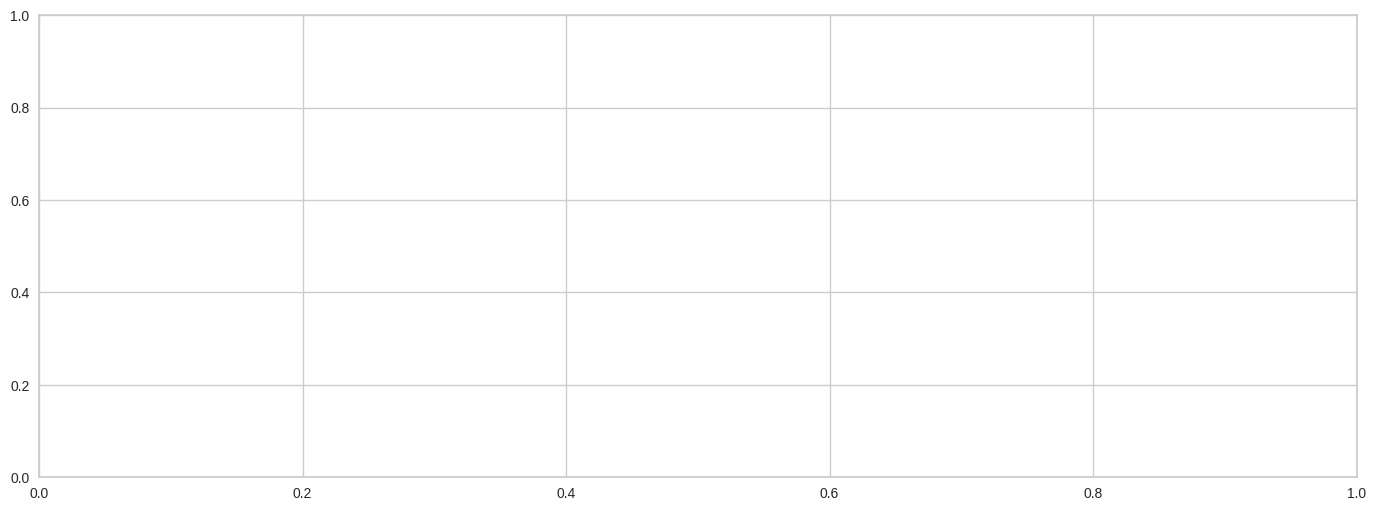

In [194]:
evaluate_model(best_model)

In [195]:
final_best_model = finalize_model(best_model)

## Test data

In [196]:
predictions = predict_model(best_model, data = test)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,str,20103.6712,404157633.4611,20103.6721,-1013331334622208983040.0000,9.3020,24090.1277


In [198]:
fig = px.line(predictions, x="date", y=["price", 'prediction_label'], template = 'plotly_dark')
fig.show()

## Predictions

In [199]:
start_date = df['date'].max()

In [200]:
end_date = df['date'].max() +  pd.DateOffset(days=10)

In [201]:
future_df = pd.DataFrame() 
future_dates = pd.date_range(start = start_date, end = end_date, freq = '1D')
future_df['date'] = future_dates  
future_df['day'] = future_df["date"].dt.day
future_df['month'] = future_df["date"].dt.month
future_df['year'] = future_df["date"].dt.year  
future_df['series'] = range(len(df), len(df)+len(future_dates))
future_df

,date,day,month,year,series
0,2023-05-07,7,5,2023,366
1,2023-05-08,8,5,2023,367
2,2023-05-09,9,5,2023,368
3,2023-05-10,10,5,2023,369
4,2023-05-11,11,5,2023,370
5,2023-05-12,12,5,2023,371
6,2023-05-13,13,5,2023,372
7,2023-05-14,14,5,2023,373
8,2023-05-15,15,5,2023,374
9,2023-05-16,16,5,2023,375


In [202]:
predictions_future = predict_model(final_best_model, data=future_df)
predictions_future.head()

,date,day,month,year,series,prediction_label
0,2023-05-07,7,5,2023,366,28553.243955
1,2023-05-08,8,5,2023,367,28553.243955
2,2023-05-09,9,5,2023,368,28553.243955
3,2023-05-10,10,5,2023,369,28553.243955
4,2023-05-11,11,5,2023,370,28553.243955


In [203]:
concat_df = pd.concat([df, predictions_future], axis=0).reset_index(drop=True)

In [204]:
concat_df

,date,price,day,month,year,series,prediction_label
0,2022-05-07,36013.03,7,5,2022,1,NaN
1,2022-05-08,35471.42,8,5,2022,2,NaN
2,2022-05-09,34082.21,9,5,2022,3,NaN
3,2022-05-10,30175.71,10,5,2022,4,NaN
4,2022-05-11,31003.93,11,5,2022,5,NaN
...,...,...,...,...,...,...,...
372,2023-05-13,NaN,13,5,2023,372,28553.243955
373,2023-05-14,NaN,14,5,2023,373,28553.243955
374,2023-05-15,NaN,15,5,2023,374,28553.243955
375,2023-05-16,NaN,16,5,2023,375,28553.243955


In [205]:
px.line(concat_df, x=concat_df.index, y=["price", "prediction_label"], template = 'plotly_dark')
fig.show()

### Save model

In [206]:
save_model(best_model, 'model')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=FastMemory(location=/tmp/joblib),
          steps=[('target_transformation',
                  TransformerWrapperWithInverse(transformer=TargetTransformer(estimator=PowerTransformer(standardize=False)))),
                 ('numerical_imputer',
                  TransformerWrapper(include=['day', 'month', 'year', 'series'],
                                     transformer=SimpleImputer())),
                 ('categorical_imputer',
                  TransformerWrapper(include=[],
                                     transformer=SimpleImputer(strategy='most_frequent'))),
                 ('trained_model', AdaBoostRegressor(random_state=123))]),
 'model.pkl')